<a href="https://colab.research.google.com/github/upayuryeva/Social-Network-Analysis-Project/blob/main/SN_project_main_source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Social Network Analysis Project
<center><h3>Irina Yuryeva

Friend list was collected from my vk page: [Ira Yuryeva](https://vk.com/upayuryeva)

# My Network Summary


In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
import pandas as pd
from matplotlib.colors import ListedColormap
from scipy.stats import spearmanr
import seaborn as sns 
from collections import Counter
import sklearn
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import squareform
from zlib import adler32
from sklearn.cluster import KMeans
import math

In [2]:
G = nx.read_gexf("friends_graph.gexf")
G.remove_node('Хусрав Джумае')

All nodes attributes

In [3]:
set([k for n in G.nodes for k in G.nodes[n].keys()])

{'byear',
 'city',
 'country',
 'faculty_name',
 'label',
 'n_friends',
 'name',
 'sex',
 'university_name'}

All edges attributes

In [4]:
set([k for n in G.edges for k in G.edges[n].keys()])

{'id', 'mut_friends'}

Size and order of the graph

In [5]:
print('Size:', G.size())
print('Order:', G.order())

Size: 969
Order: 158


Diameter and radius of maximum connected component

In [6]:
# graph of largest connected component
g = max(nx.connected_components(G), key=len) 
g = G.subgraph(g).copy() 

In [7]:
print('Diameter:', nx.diameter(g))
print('Radius:', nx.radius(g))

Diameter: 7
Radius: 4


##Clustering Coefficient 
*   global
*   average local
* histogram of locals



In [8]:
print('Global clustering:', nx.average_clustering(G))

Global clustering: 0.5227713280909424


In [9]:
def color_seq(dict_to_sort):
  """
  Sorts dict by values and returns sequense to use in graph as node colors

  Parameters
  ----------
  dict_to_sort: dict
    dict where keys are nodes and values are some nodeses information
  
  Returns
  -------
    ordered sequense
  """
  sorted_d = sorted(dict_to_sort, key=dict_to_sort.get)
  return [sorted_d.index(el) for el in dict_to_sort.keys()]

In [10]:
def best_names_labels(values_dict, n, graph, rev=False):
  """
  Returns dict of top names to write them on nodes on graph
  """
  best_names = {}
  sorted_val = sorted(values_dict, key=values_dict.get, reverse=rev)
  for n in sorted_val[:n]:
    best_names.update({n: graph.nodes[n]['name']})

  return best_names

In [11]:
def draw_color_graph(dict_val, graph, fig, col_bar_lab, ax_n=None, 
                     node_colors=False, spec_labels=False, rev=False):
  """
  Draw graph with kamada kawai layoyt and known color dictribution

  Parameters
  ----------

  """
  if spec_labels:
    if rev:
      s_labels = best_names_labels(dict_val, 5, g, True)
    else:
      s_labels = best_names_labels(dict_val, 5, g)
  else:
    s_labels = {}

  if node_colors:
    n_colors = color_seq(dict_val)
  else:
    n_colors = range(len(graph.nodes()))

  nx.draw_kamada_kawai(graph, 
                       ax=ax_n,
                       node_color=n_colors,
                       cmap=plt.cm.RdPu,
                       labels=s_labels, 
                       font_size=10,
                       node_size=80, 
                       width=0.2)
  norm = plt.Normalize(0, max(dict_val.values()))

  fig.colorbar(ScalarMappable(cmap='RdPu', norm=norm), 
             ax=ax_n,
             label=col_bar_lab)

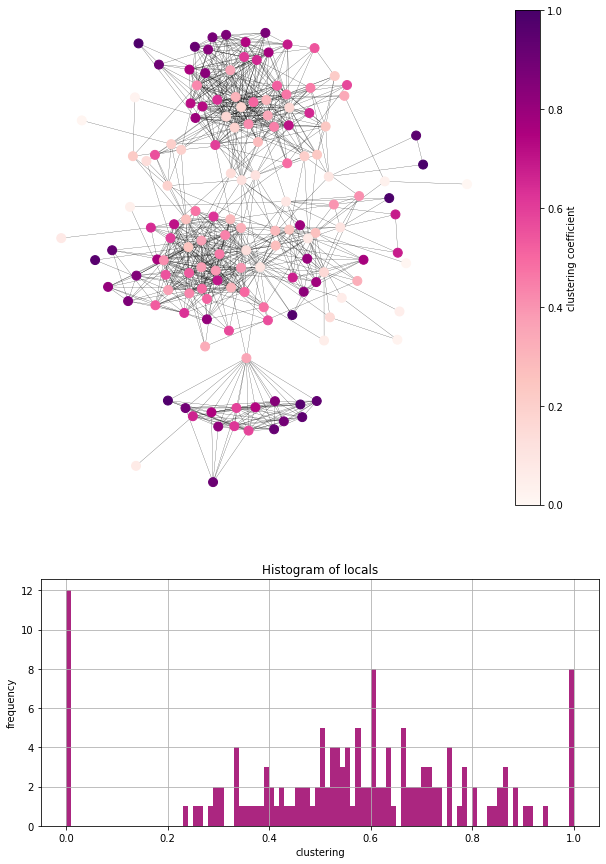

In [12]:
cluster_coef = nx.clustering(g)

fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]}, figsize=(10,15))

draw_color_graph(cluster_coef, g, fig, 'clustering coefficient', ax0,
                 node_colors=True, rev=False)

ax1.hist(cluster_coef.values(), bins=100, color=[0.67, 0.15, 0.5, 1])
ax1.set_title('Histogram of locals')
ax1.set_xlabel('clustering')
ax1.set_ylabel('frequency')
ax1.grid()

plt.show()

## Average path length

In [13]:
print('Average shortest path length:', nx.average_shortest_path_length(g))

Average shortest path length: 2.968928111785255


In [14]:
avg_path_lengths = dict([(node, np.mean(list(lengths.values()))) for node, lengths in dict(nx.all_pairs_shortest_path_length(g)).items()])

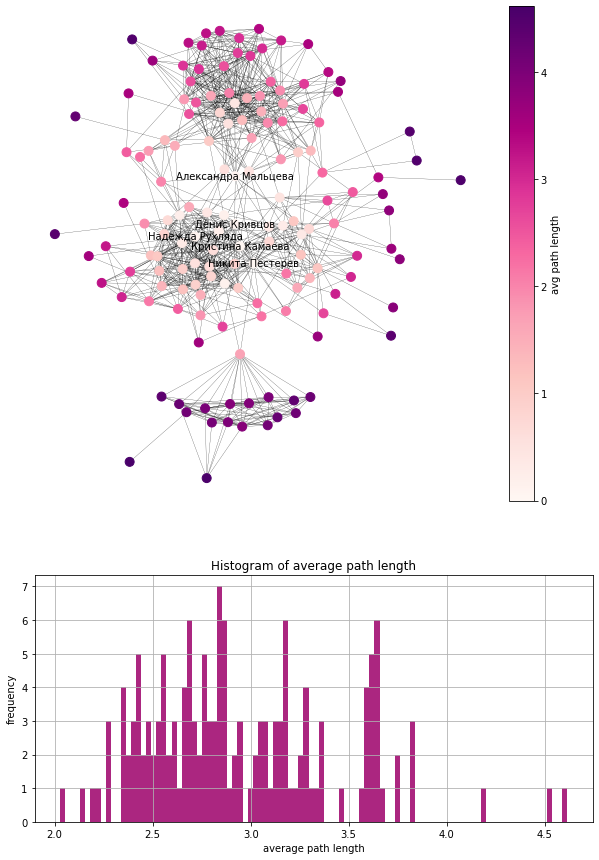

In [15]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]}, figsize=(10,15))

draw_color_graph(avg_path_lengths, g, fig, 'avg path length',ax0, 
                 node_colors=True, 
                 spec_labels=True, rev=False)

ax1.hist(avg_path_lengths.values(), bins=100, color=[0.67, 0.15, 0.5, 1])
ax1.set_title('Histogram of average path length')
ax1.set_xlabel('average path length')
ax1.set_ylabel('frequency')
ax1.grid()

plt.show()

## Degree distribution

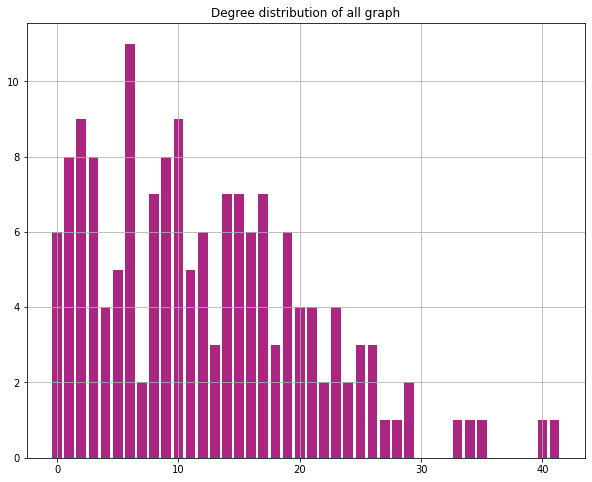

In [16]:
plt.figure(figsize=(10, 8))
degree_seq = [degree for (node, degree) in G.degree]
bins, freq = np.unique(degree_seq, return_counts=True)
plt.bar(bins, freq, color=[0.67, 0.15, 0.5, 1])
plt.title('Degree distribution of all graph')
plt.grid()
plt.show()

PDF, CDF

In [17]:
pdf = [prob/g.number_of_nodes() for prob in nx.degree_histogram(g)]
cdf = np.cumsum([prob/g.number_of_nodes() for prob in nx.degree_histogram(g)])

In [18]:
def visualize_cdf_pdf(distr_func, title):
  plt.figure(figsize=(10,6)) 
  plt.plot(distr_func, color=[0.67, 0.15, 0.5, 1])
  plt.ylabel('probability')
  plt.xlabel('node degrees')
  plt.title(title)
  plt.xticks(np.arange(0, 50, 5))
  plt.show()

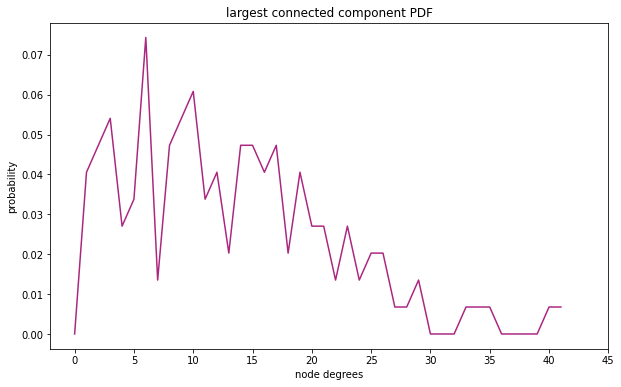

In [19]:
visualize_cdf_pdf(pdf, 'largest connected component PDF')

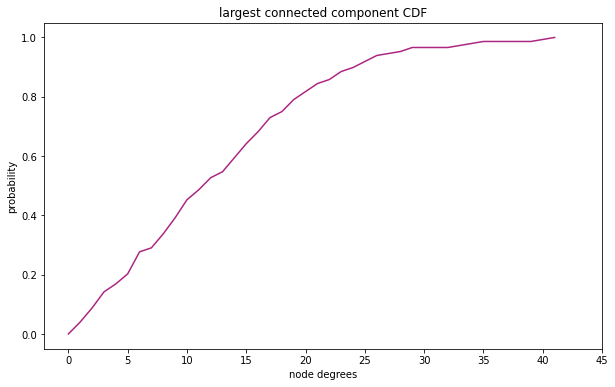

In [20]:
visualize_cdf_pdf(cdf, 'largest connected component CDF')

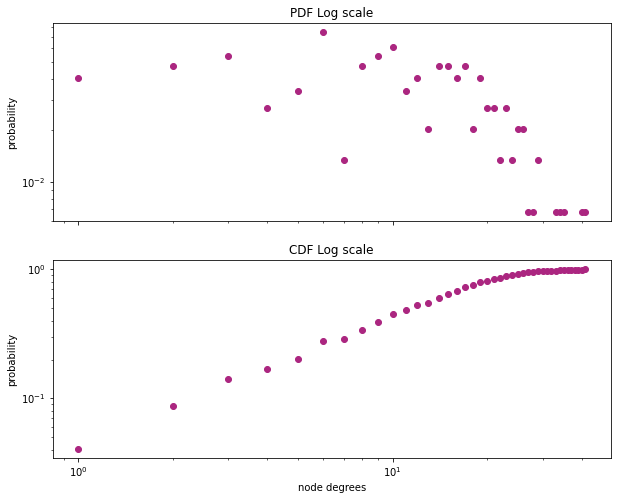

In [21]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(10,8))
ax1.loglog(np.arange(0, len(pdf)), 
           pdf, 
           color=[0.67, 0.15, 0.5, 1],
           marker='o',
           linestyle='None')
ax1.set_ylabel('probability')
ax1.set_title('PDF Log scale')
        
ax2.loglog(np.arange(0, len(cdf)), 
           cdf, 
           color=[0.67, 0.15, 0.5, 1], 
           marker='o', 
           linestyle='None')
ax2.set_ylabel('probability')
ax2.set_xlabel('node degrees')
ax2.set_title('CDF Log scale')
plt.show()

Fitting PDF

MLE

In [22]:
import scipy
from scipy import stats

def power_law_cdf(x, alpha=3.5, x_min=1):
    C = (alpha - 1) / x_min ** (1 - alpha)
    return 1 + C * 1/(-alpha + 1) * x ** (-alpha + 1)

def power_law_pdf(x, alpha=3.5, x_min=1):
    C = (alpha - 1) / x_min ** (1 - alpha)
    return C * x ** (-alpha)

def mle_power_law_params(degree_sequence):

  x_max = int(degree_sequence.max())
  x_min = int(degree_sequence.min())
  result_list = []

  while x_min < x_max:
    cutted_degree_sequence = degree_sequence[degree_sequence >= x_min]
    alpha = 1 + cutted_degree_sequence.size * 1/np.sum(np.log(cutted_degree_sequence / x_min))
    kstest = stats.kstest(cutted_degree_sequence, 
                                cdf = lambda x: power_law_cdf(x, alpha, x_min))
    result_list.append((alpha, x_min, kstest[0]))
    x_min += 1
    
  return min(result_list, key = lambda t: t[2])[:2]

Regression

In [23]:
from sklearn.linear_model import LinearRegression

def alpha_log_bins(x_train, bins):
  binning = np.logspace(np.log10(x_train.min()), np.log10(x_train.max()), bins)
  histogram = np.histogram(x_train, bins=binning, density=True)
  density = histogram[0][np.where(histogram[0] != 0)]
  density = np.log(density / len(x_train))
  bin_centres = np.log((histogram[1][1:] + histogram[1][:-1]) / 2)
  bin_centres = bin_centres[np.where(histogram[0] != 0)]
  bin_centres = bin_centres.reshape(-1, 1)
  regression = LinearRegression()
  regression.fit(bin_centres, density)
  
  return abs(regression.coef_[-1])

<Figure size 1080x720 with 0 Axes>

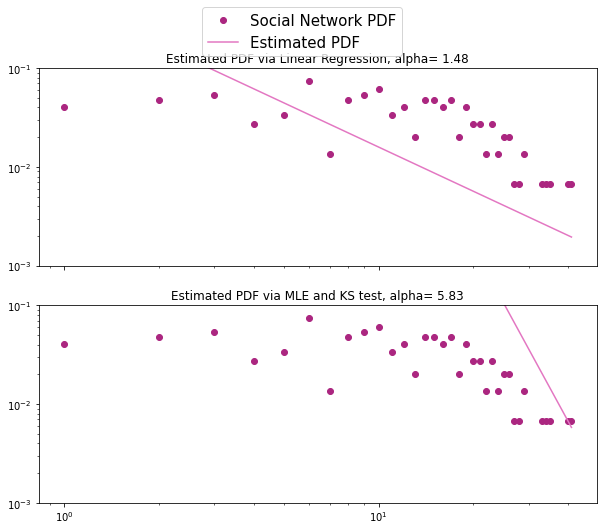

In [24]:
bins = 100
degree_sequence = np.array(list(dict(nx.degree(g)).values()))
x_min = degree_sequence.min()

binning = np.logspace(np.log10(x_min), np.log10(degree_sequence.max()), bins)
hist, bin_edges = np.histogram(degree_sequence, bins=binning, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
x_space = np.linspace(x_min, degree_sequence.max(), 100)


plt.figure(figsize=(15,10))   
plt.rcParams['axes.grid'] = False
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(10,8))


ax1.loglog(np.arange(0, len(pdf)), 
           pdf, 
           color=[0.67, 0.15, 0.5, 1], 
           marker='o', 
           linestyle='None',
           label='Social Network PDF')
hat_alpha_reg = alpha_log_bins(degree_sequence, bins)
ax1.loglog(x_space, power_law_pdf(x_space, hat_alpha_reg, x_min), 
         label='Estimated PDF', c='tab:pink')
ax1.set_title('Estimated PDF via Linear Regression, alpha= {:.2f}'.format(hat_alpha_reg))
ax1.set_ylim(0.001, 0.1)
        
ax2.loglog(np.arange(0, len(pdf)), 
           pdf, 
           color=[0.67, 0.15, 0.5, 1], 
           marker='o', 
           linestyle='None',
           label='Social Network PDF')
hat_alpha, hat_x_min = mle_power_law_params(degree_sequence)
ax2.loglog(x_space, power_law_pdf(x_space, hat_alpha, hat_x_min), 
         label='Estimated PDF', c='tab:pink')
ax2.set_title('Estimated PDF via MLE and KS test, alpha= {:.2f}'.format(hat_alpha))
ax2.set_ylim(0.001, 0.1)
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', prop={'size': 15})

plt.show()

##Some network information

As already shown, nodes in the grapn have some attributes: 
* 'byear' - year of birth
* 'city',
* 'country',
* 'faculty_name',
* 'n_friends' - number of friends  
* 'sex'
* 'university_name'

And edges have attribute 'mut_friends' - number of mutual friend between 2 people

Let's look what we can find out from this information

In [25]:
import collections

In [26]:
from IPython.display import SVG

### Friends dictributions graph


Size of a node shows how many mutual friends I have with this person.  
Color of a node shows how many friends the person have. The darker the color, the more friends the person have

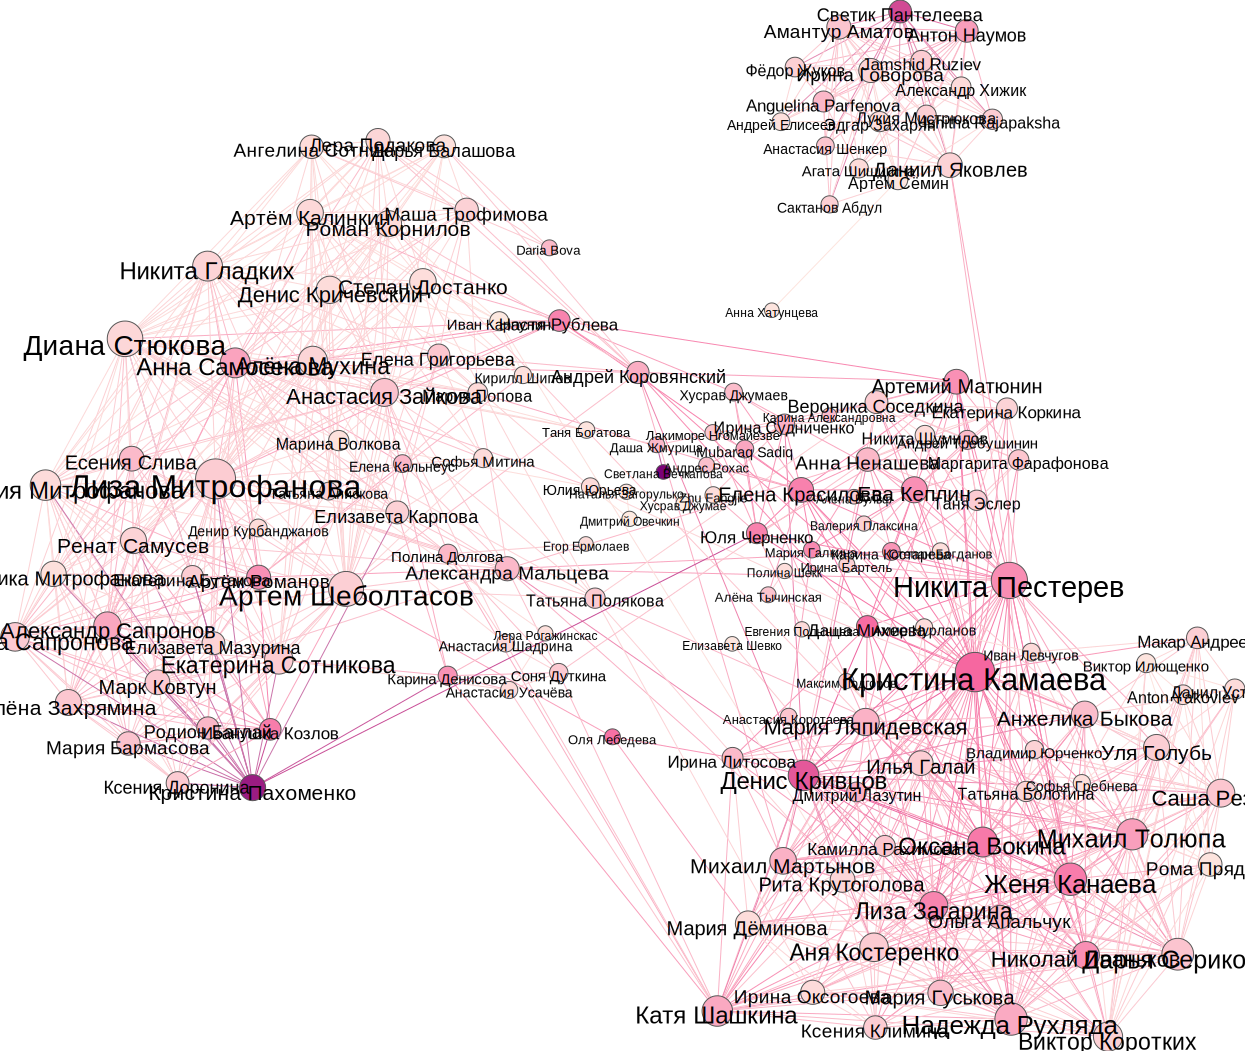

In [27]:
SVG(filename="friends_1.svg")

### Cities graph
* Green - <font color='green'>Novosibirsk</font>   
* Red - <font color='red'>Moscow</font>  
* Aqua - <font color='Aqua'>St.Petersburg</font>  
* Yellow - <font color='yellow'>Omsk</font>
* Grey - others 
* White - not shown

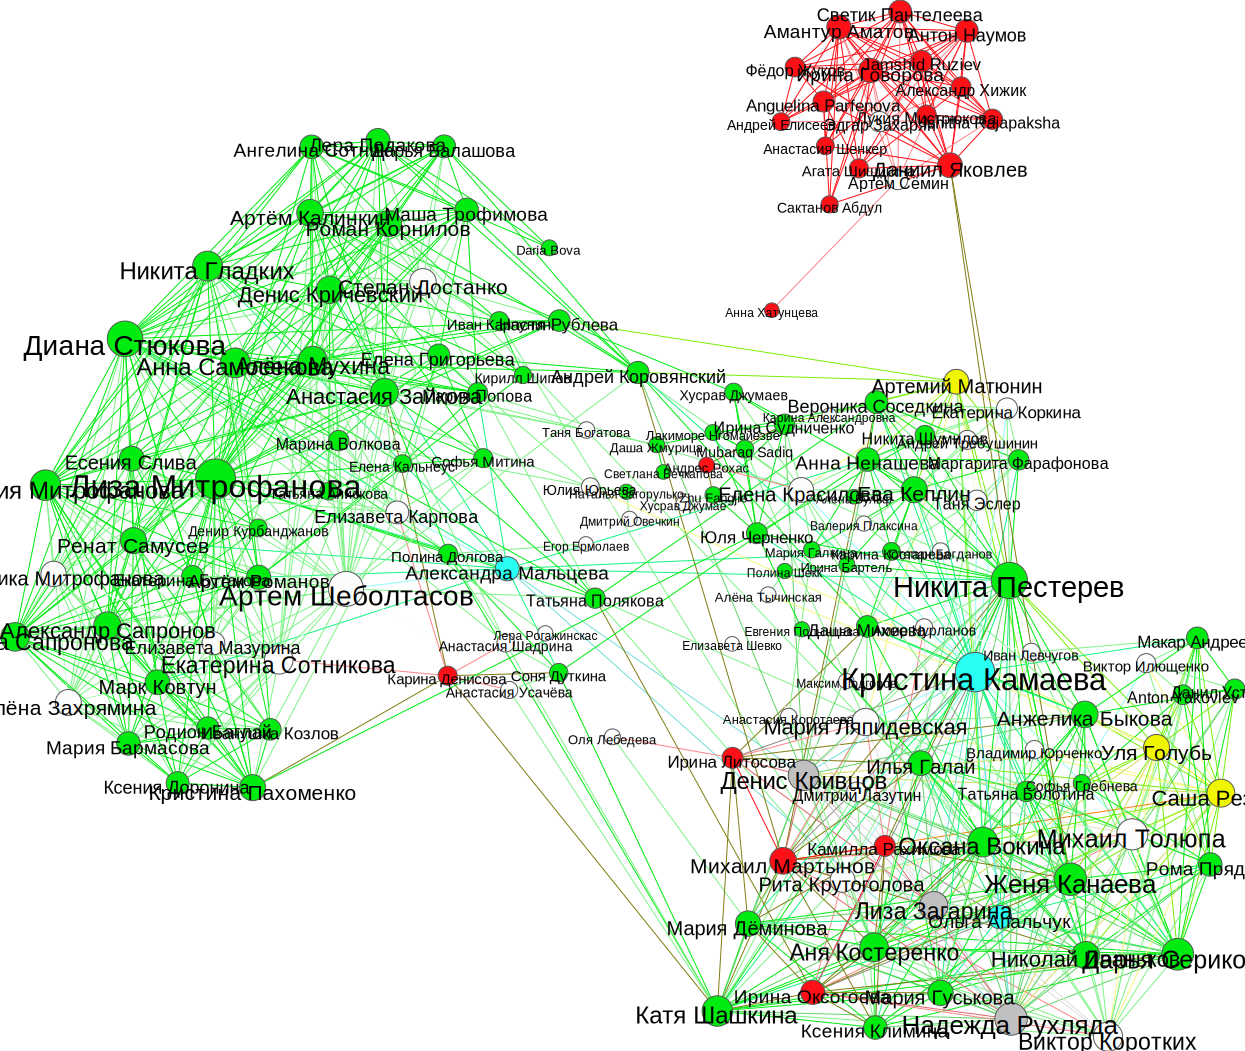

In [28]:
SVG(filename="cities.svg")

### Universities graph
* Green - <font color='green'>Novosibirsk State University</font>   
* Blue - <font color='blue'>HSE</font>  
* Yellow - <font color='yellow'>Siberian Filial RANEPA (СИУ РАНХИГС)</font>
* Grey - others 
* White - not shown

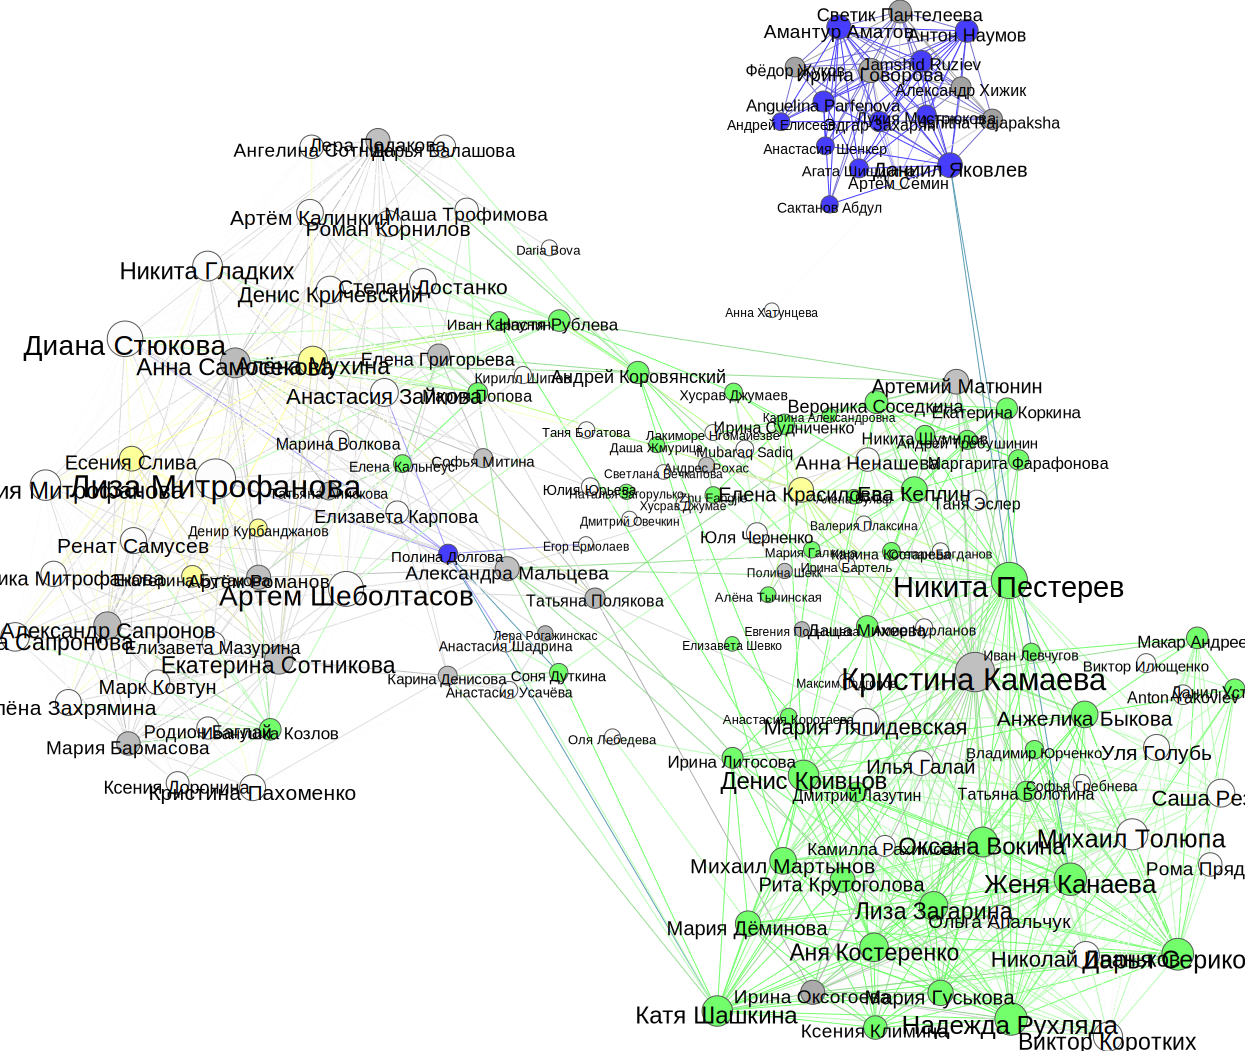

In [29]:
SVG(filename="uni_new.svg")

### Faculties graph

* Green - <font color='green'>Mechanics and mathematics faculty of NSU</font> 
* Aque - <font color='aqua'>Faculty of CS of HSE</font>    
* Blue - <font color='blue'>Physics faculty</font>  
* Red - <font color='red'>Faculty of economics</font>
* Purple - <font color='purple'>Faculty of humanities</font>
* Grey - others 
* White - not shown

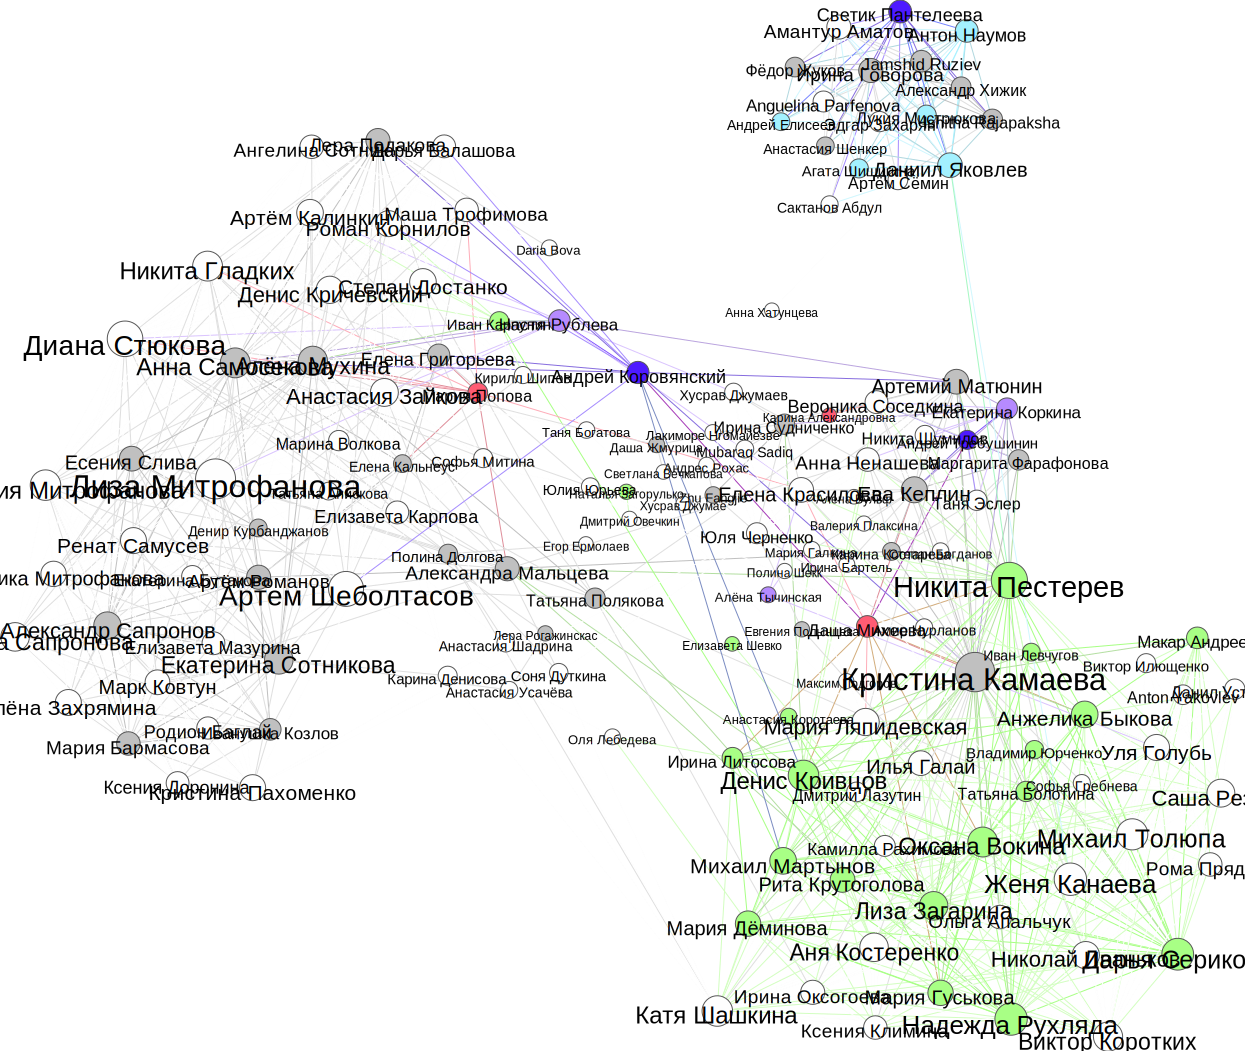

In [30]:
SVG(filename="faculties.svg")

### Gender graph

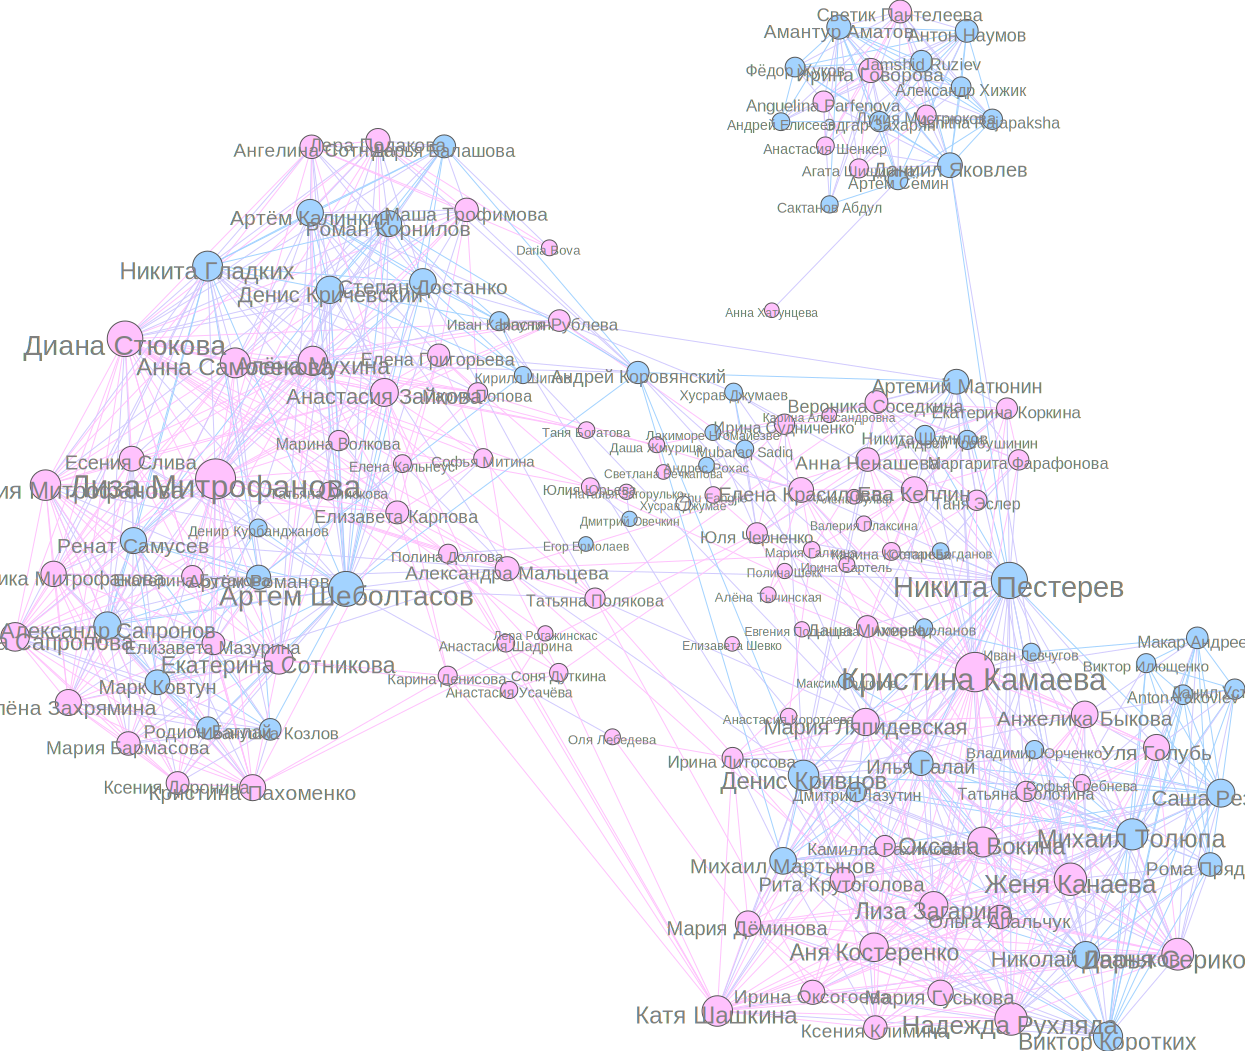

In [31]:
SVG(filename="sex.svg")

#Structural Analysis

## Comparison with random graphs 

In [32]:
n_nodes = len(g.nodes())
avg_edges = int(np.array([d for n, d in g.degree()]).mean())
prob = avg_edges/n_nodes

Generating Erdos Renyi, Barabasi Albert and Watts-Strogatz random graphs

In [33]:
def graph_properties(g):
  diameter = nx.diameter(g)
  radius = nx.radius(g)
  avg_path = nx.average_shortest_path_length(g)
  clustering = nx.average_clustering(g)
  return {'diameter': diameter,
          'radius': radius,
          'avg shortest path': avg_path,
          'avg clustering': clustering}

def get_gk(expected, actual, sigma): 
  return {k: (math.exp(-(expected[k]-actual[k])**2/(2*sigma[k]**2))) for k in actual}

In [34]:
er = nx.fast_gnp_random_graph(n_nodes, prob, seed=1)
ba = nx.barabasi_albert_graph(n_nodes, avg_edges, seed=1)
ws = nx.watts_strogatz_graph(n_nodes, avg_edges, p=0.1, seed=1)

graphs_list = [g, er, ba, ws]

KS_er = scipy.stats.ks_2samp(list(dict(g.degree()).values()), list(dict(er.degree()).values()))
KS_ba = scipy.stats.ks_2samp(list(dict(g.degree()).values()), list(dict(ba.degree()).values()))
KS_was = scipy.stats.ks_2samp(list(dict(g.degree()).values()), list(dict(ws.degree()).values()))

ks_list = [('',''), KS_er, KS_ba, KS_was]

compare_df = pd.DataFrame(data= {'clustering': [nx.average_clustering(graph) for graph in graphs_list],
                                 'avg path lng': [nx.average_shortest_path_length(graph) for graph in graphs_list], 
                                 'diameter': [nx.diameter(graph) for graph in graphs_list], 
                                 'radius': [nx.radius(graph) for graph in graphs_list],
                                 'KS stat': [KS[0] for KS in ks_list], 
                                 'KS p-val': [KS[1] for KS in ks_list]},
                          index = ['my graph', 'erdos-renyi', 'barabasi-albert', 'watts-strogatz'])

compare_df

clustering  avg path lng  ...   KS stat     KS p-val
my graph           0.558094      2.968928  ...                       
erdos-renyi        0.092593      2.232212  ...  0.243243  0.000297039
barabasi-albert    0.254167      1.870656  ...  0.527027  3.83352e-19
watts-strogatz     0.513040      2.760342  ...  0.398649  6.82991e-11

[4 rows x 6 columns]

Erdos-Renyi random graph is the most acceptable to my graph. But if we take a look on others parameters, we will se that Watts-Stroganz random graph look similar to my network.

## Centralities

In [35]:
deg_cs = nx.degree_centrality(g)
clos_cs = nx.closeness_centrality(g)
betw_cs = nx.betweenness_centrality(g)
eig_cs = nx.eigenvector_centrality(g, max_iter=600)

In [36]:
centrality_df = pd.DataFrame({'name': [nx.get_node_attributes(G, 'name')[n] for n in g.nodes()],
                              'city': [nx.get_node_attributes(G, 'city')[n] for n in g.nodes()],
                              'university': [nx.get_node_attributes(G, 'university_name')[n] for n in g.nodes()],
                              'degree_c': list(deg_cs.values()),
                              'closeness_c': list(clos_cs.values()),
                              'betweenness_c': list(betw_cs.values()),
                              'eigenvector_c': list(eig_cs.values())})

In [37]:
def centrality_plots(dict_cs, name_c, graph):
  fig = plt.figure(figsize=(10,7))

  draw_color_graph(dict_cs, graph, fig, name_c, node_colors=True, 
                   spec_labels=True, rev=True)

  print(centrality_df.nlargest(5, name_c)[['name', 'city', 'university', name_c]])

Degree centrality

                 name             city university  degree_c
70   Лиза Митрофанова      Новосибирск             0.278912
109  Кристина Камаева  Санкт-Петербург      СПбГУ  0.272109
135   Никита Пестерев      Новосибирск        НГУ  0.238095
26      Диана Стюкова      Новосибирск             0.231293
60   Артем Шеболтасов                              0.224490


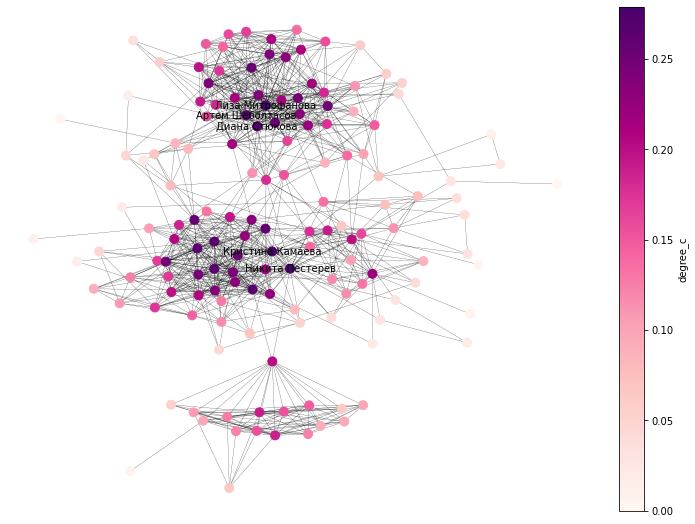

In [38]:
centrality_plots(deg_cs, 'degree_c', g)

Degree centrality assigns a score based simply on the number of links held by each node. In my network highest degree centrality have following people:
* **Liza Mitrofanova** is my best friend. We were classmates and used to go to taekwondo group together. 
* **Kristina Kamaeva** and **Nikita Pesterev** are my coursemates in NSU and they are members of Photoclub NSU with me. So, we have a lot mutual friends.
* **Diana Styukova** and **Artem Sheboltasov** are my classmates and ex members of my taekwondo team.

Сloseness centrality

                    name             city     university  closeness_c
135      Никита Пестерев      Новосибирск            НГУ     0.490000
109     Кристина Камаева  Санкт-Петербург          СПбГУ     0.465190
117        Денис Кривцов      Севастополь            НГУ     0.452308
14   Александра Мальцева  Санкт-Петербург  НИУ ВШЭ (СПб)     0.449541
88       Надежда Рухляда           Бердск            НГУ     0.436202


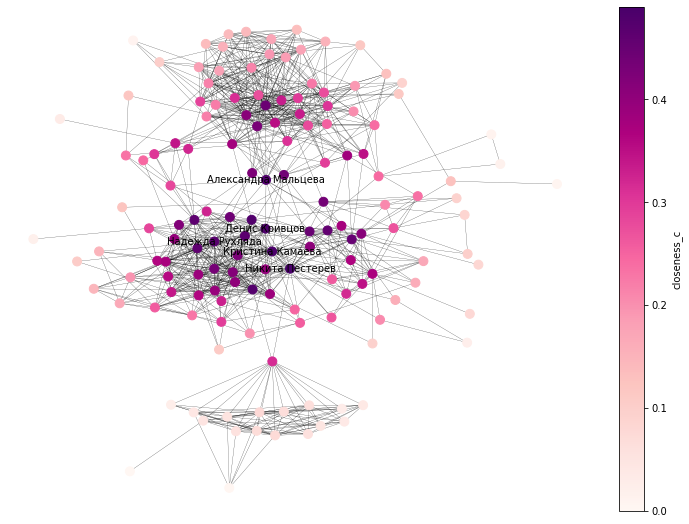

In [39]:
centrality_plots(clos_cs, 'closeness_c', g)

The more closeness centrality rank a node is, the closer it is to all other nodes. In my network these nodes are:
* **Kristina Kamaeva** and **Nikita Pesterev**
* **Denis Krivtsov** - my coursemate, very social active guy from NSU
* **Alexandra Maltseva** - active girl from my school in a year older grade than me, she also studied in NSU, so, she a main connected node between my school friends and NSU friends
* **Nadezhda Ruhlyada** is my friend. She was born in Novosibirsk region, so, she know not only my university friends, but Novosibirsk friends as well

Betweenness centrality

                    name             city        university  betweenness_c
135      Никита Пестерев      Новосибирск               НГУ       0.217524
132       Даниил Яковлев           Москва  НИУ ВШЭ (ГУ-ВШЭ)       0.206690
14   Александра Мальцева  Санкт-Петербург     НИУ ВШЭ (СПб)       0.124011
94          Женя Канаева      Новосибирск               НГУ       0.078156
109     Кристина Камаева  Санкт-Петербург             СПбГУ       0.074906


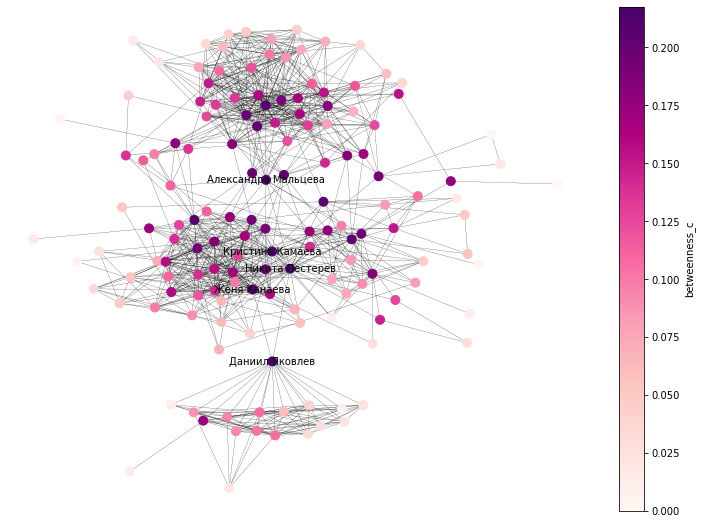

In [40]:
centrality_plots(betw_cs, 'betweenness_c', g)

Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. In my network there are people, who are connected nodes between different communities:
* **Nikita Pesterev** and **Kristina Kamaeva**: Mechanical-Mathematics Faculty + Photoclub NSU friends
* **Daniil Yakovlev**: NSU friends + HSE friends. He is Physical Faculty NSU alumni and HSE student
* **Alexandra Maltseva**: School friends + NSU friends
* **Zhenya Kanaeva**: Daniil Yakovlev + NSU friends. She is my NSU coursemate

Eigenvector centrality

                 name             city university  eigenvector_c
109  Кристина Камаева  Санкт-Петербург      СПбГУ       0.221434
88    Надежда Рухляда           Бердск        НГУ       0.212527
94       Женя Канаева      Новосибирск        НГУ       0.207174
37     Дарья Серикова      Новосибирск        НГУ       0.205292
61      Оксана Вокина      Новосибирск        НГУ       0.191043


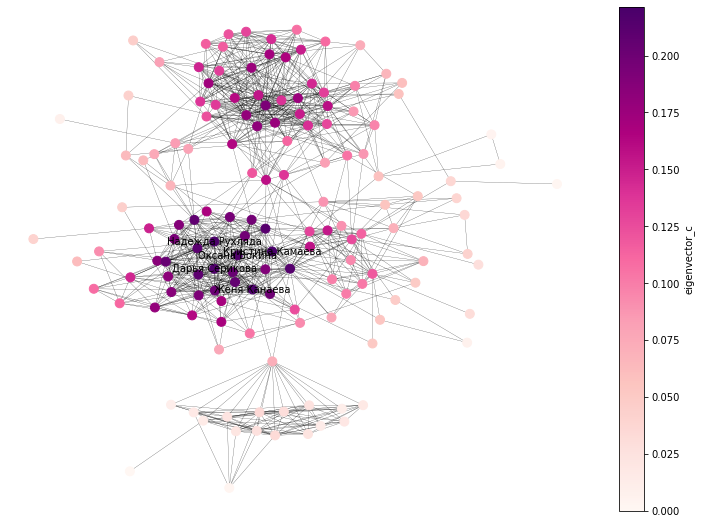

In [41]:
centrality_plots(eig_cs, 'eigenvector_c', g)

A high eigenvector score means that a node is connected to many nodes who themselves have high scores. In my network nodes with high eigenvector score are: **Kristina Kamaeva, Nadezhda Ruhlyada, Zhenya Kanaeva, Daria Serikova, Oksana Vkona**. They all are my NSU coursemates.

## PageRank

                 name             city university  PageRank
109  Кристина Камаева  Санкт-Петербург      СПбГУ  0.013783
135   Никита Пестерев      Новосибирск        НГУ  0.012959
70   Лиза Митрофанова      Новосибирск             0.012661
126        Ева Кеплин      Новосибирск        НГУ  0.012482
26      Диана Стюкова      Новосибирск             0.012148


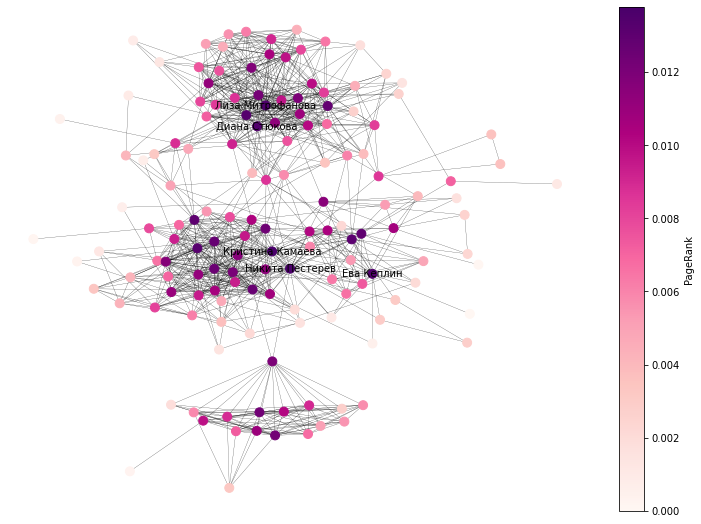

In [42]:
pr_dict = nx.pagerank(g, 0.5)
centrality_df['PageRank'] = pr_dict.values()
centrality_plots(pr_dict, 'PageRank', g)

 **Eva Keplin** is active girl from NSU photoclub.
 About others top nodes I'm alredy told.

Comparison with centralities

In [43]:
def pearson(a,b):
    return np.corrcoef(a, b)[0][1]
def spearman(a,b):
    return spearmanr(a, b)[0]

In [44]:
corrvals = [
    ('Degree centrality', list(centrality_df['degree_c'])),
    ('Closeness centrality', list(centrality_df['closeness_c'])),
    ('Betweenness centrality', list(centrality_df['betweenness_c'])),
    ('Eigenvector centrality', list(centrality_df['eigenvector_c'])),
    ('PageRank', list(centrality_df['PageRank']))
]

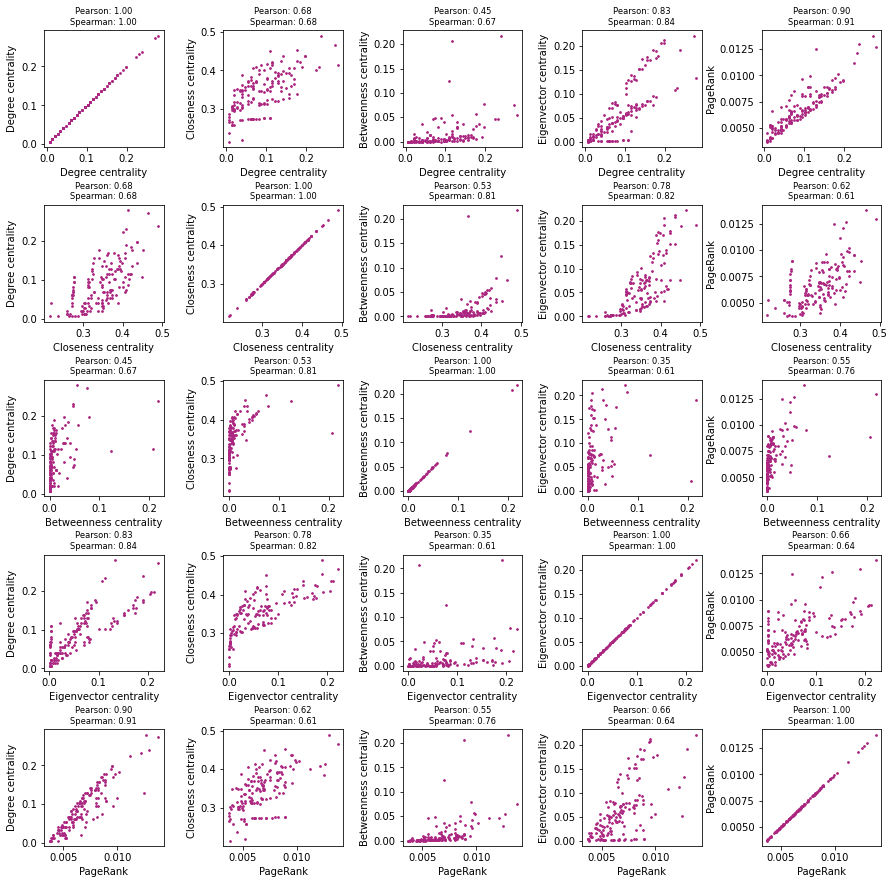

In [45]:
plt.figure(figsize=(5*3, 5*3))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
k = 1
for i in range(len(corrvals)):
    for j in range(len(corrvals)):
        i_label, i_vals = corrvals[i]
        j_label, j_vals = corrvals[j]
        pcorrelation = pearson(i_vals, j_vals)
        scorrelation = spearman(i_vals, j_vals)
        plt.subplot(5, 5, k)
        plt.scatter(i_vals, j_vals, s=3, color=[0.67, 0.15, 0.5, 1])
        plt.title('Pearson: {:.2f}\nSpearman: {:.2f}'.format(pcorrelation, scorrelation), fontsize='small')
        plt.xlabel(i_label)
        plt.ylabel(j_label)
        k += 1

## Assortative Mixing

In [46]:
def atr_mapping(G, atr, threshold=2, only_names=True):
  mapping = {}
  atrs = nx.get_node_attributes(G, atr)
  occ_atr = [(v,occ) for v,occ in Counter(atrs.values()).most_common() if v != ''][:threshold]
  for (atr_val, occ), i in zip(occ_atr, range(0,len(occ_atr))):
    mapping[atr_val] = i
  return mapping

def atr_mixing(G, atr, threshold=2):
  mapping_for_plot = atr_mapping(G, atr, threshold)
  mapping_for_func = atr_mapping(G, atr, threshold, only_names=False)
  atrs = nx.get_node_attributes(G, atr)
  mixing = nx.attribute_mixing_matrix(G, atr, mapping=mapping_for_func)

  return mixing, mapping_for_plot

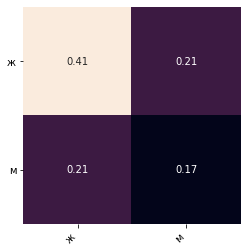

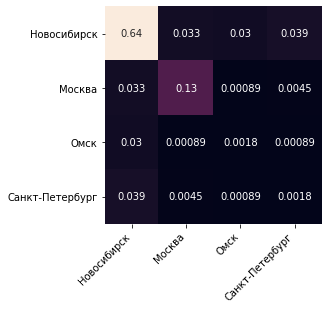

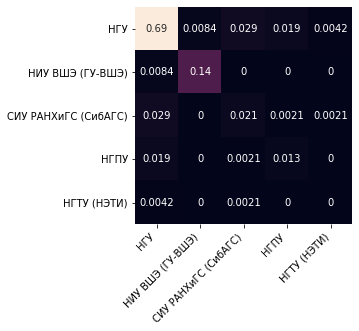

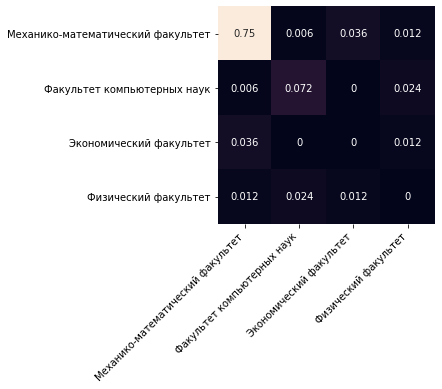

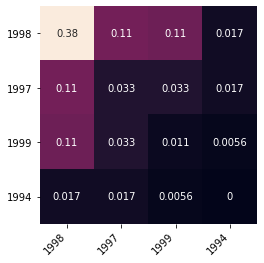

In [47]:
atrs = {'sex':2,
        'city':4, 
        'university_name':5, 
        'faculty_name': 4,
        'byear':4}

for k,v in atrs.items():
  fig = plt.figure(figsize=(4, 4))
  mixing, mapping = atr_mixing(g, k, v)
  hmap = sns.heatmap(
      mixing,
      cbar=False,
      annot=True,
      square=True)
  hmap.set_xticklabels(
      labels=[k for k,_ in mapping.items()], 
      rotation=45, 
      horizontalalignment='right')
  hmap.set_yticklabels(
      labels=[k for k,_ in mapping.items()], 
      rotation=0)
  plt.show()

#### Equivalence

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.csgraph import reverse_cuthill_mckee

def sim_matrices(G):
  A = nx.to_numpy_array(G)
  pc = np.corrcoef(A)
  J = np.zeros(A.shape)
  for i, j, c in nx.jaccard_coefficient(nx.from_numpy_array(A)):
    J[i,j] = c 
    J[j,i] = 1-c 

  cs = cosine_similarity(A)
  
  return A, pc, J, cs

def cm_order(G):
  adj_matrix = nx.adjacency_matrix(G)

  return reverse_cuthill_mckee(adj_matrix)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


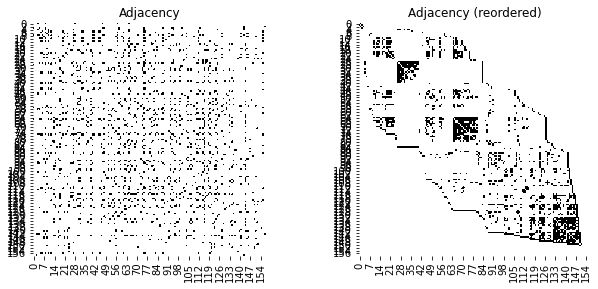

In [49]:
A, corr, J, cos = sim_matrices(G)
order = cm_order(G)

fig = plt.figure(figsize=(10, 10*2))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

cases = [[1, A, plt.cm.Greys, 'Adjacency', range(len(nx.degree(G)))],
         [2, A, plt.cm.Greys, 'Adjacency (reordered)', order],
         [1, corr, None, 'Pearson correlation', range(len(nx.degree(G)))], 
         [2, corr, None, 'Pearson correlation (reordered)', order], 
         [1, J, None, 'Jaccard similarity', range(len(nx.degree(G)))], 
         [2, J, None, 'Jaccard similarity (reordered)', order], 
         [1, cos, None, 'Cosine similarity', range(len(nx.degree(G)))], 
         [2, cos, None, 'Cosine similarity (reordered)', order]]

for i, matrix, cmap, t, o in cases[:2]:
    plt.subplot(1, 2, i)
    hmap = sns.heatmap(
        matrix[np.ix_(o, o)],
        cmap=cmap,
        cbar=False,
        square=True)
    plt.title(t)
plt.show()

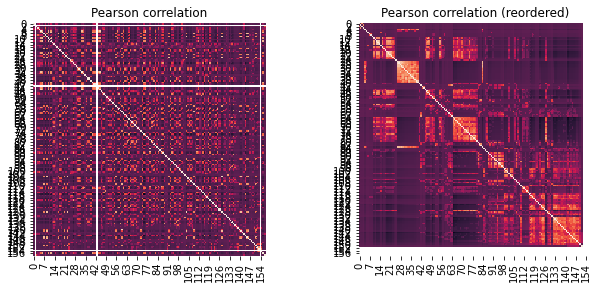

In [50]:
fig = plt.figure(figsize=(10, 10*2))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i, matrix, cmap, t, o in cases[2:4]:
    plt.subplot(1, 2, i)
    hmap = sns.heatmap(
        matrix[np.ix_(o, o)],
        cmap=cmap,
        cbar=False,
        square=True)
    plt.title(t)
plt.show()

The rigt down corne, I think, my university friends. In the big squuare we can see small but dense squares. Middle square is, maybe, my school friends. 

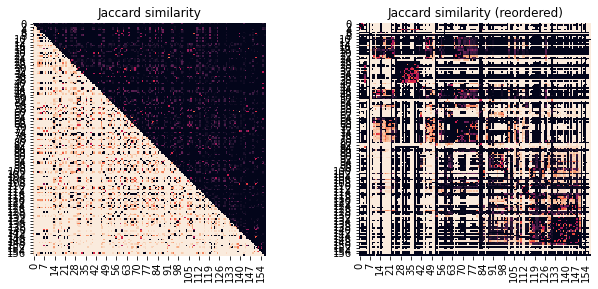

In [51]:
fig = plt.figure(figsize=(10, 10*2))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i, matrix, cmap, t, o in cases[4:6]:
    plt.subplot(1, 2, i)
    hmap = sns.heatmap(
        matrix[np.ix_(o, o)],
        cmap=cmap,
        cbar=False,
        square=True)
    plt.title(t)
plt.show()

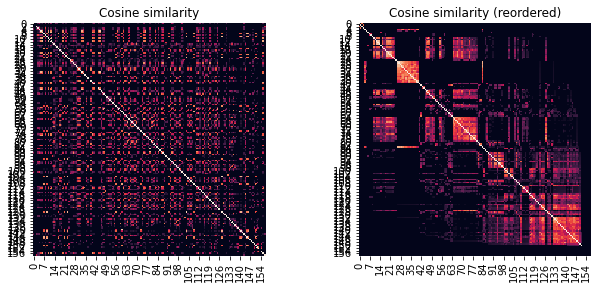

In [52]:
fig = plt.figure(figsize=(10, 10*2))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i, matrix, cmap, t, o in cases[6:8]:
    plt.subplot(1, 2, i)
    hmap = sns.heatmap(
        matrix[np.ix_(o, o)],
        cmap=cmap,
        cbar=False,
        square=True)
    plt.title(t)
plt.show()

### Structural equivalent nodes


In [53]:
node_list = list(G.nodes())
adj_df =pd.DataFrame(A, index=node_list, columns=node_list)

In [54]:
str_eq = [G.index.tolist() for _, G in adj_df.groupby(adj_df.columns.tolist()) if len(G.index) > 1]

In [55]:
for se in str_eq:
  neighbors = [neighbor for neighbor in G.neighbors(se[0])]
  for fr in se:
    print(nx.get_node_attributes(G, 'name')[fr], end=' ')
  print('share', end=' ')
  if not neighbors:
    print('0 friends\n')
  else:
    print(len(neighbors), 'friend {}\n'.format(nx.get_node_attributes(G, 'name')[neighbors[0]]))

Марина Юрьева Светлана Фирсова Александр Яковлев Кристина Овчинникова Ирина Данилова Арина Загумённова share 0 friends



There are only structure equivalents in nodes with degree 0.

# Community Detection


##Clique search

In [56]:
max_clique = sorted(nx.find_cliques(G), key = len, reverse=True)
print('Size of max clique:', len(max_clique[0]))
print('Number of max cliques:', len([c for c in max_clique if len(c)==len(max_clique[0])]))

Size of max clique: 11
Number of max cliques: 6


So, graph have 6 max cliques, let's visualize them

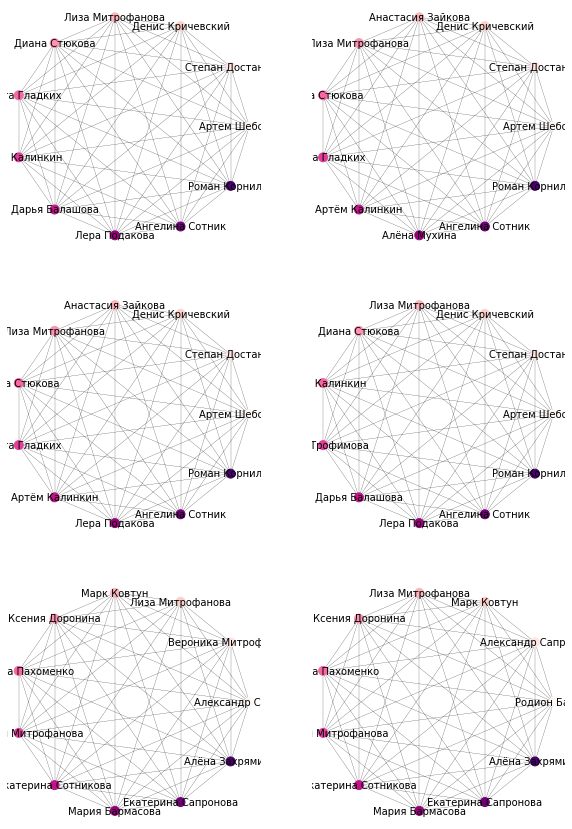

In [57]:
max_c = max_clique[:6]

fig, axes = plt.subplots(3,2, figsize=(2*5,3*5))
axe = axes.ravel()

for k, c in enumerate(max_c):
  c_g = G.subgraph(c).copy()
  names_dict = {}
  for n in c_g:
    names_dict.update({n:c_g.nodes()[n]['name']})
  nx.draw_kamada_kawai(c_g, 
                       ax=axe[k],
                       node_color=range(len(c_g.nodes())),
                       cmap=plt.cm.RdPu,
                       labels=names_dict, 
                       font_size=10,
                       node_size=80, 
                       width=0.2)

Two upper cliques are my taekwondo team friends. Other cluqies are network of my classmates and other school friends

##k-core decomposition

In [58]:
core_dict = nx.core_number(G)
nx.set_node_attributes(G, {n:{'core': c} for n, c in core_dict.items()})
nx.write_gexf(G, "cores.gexf")

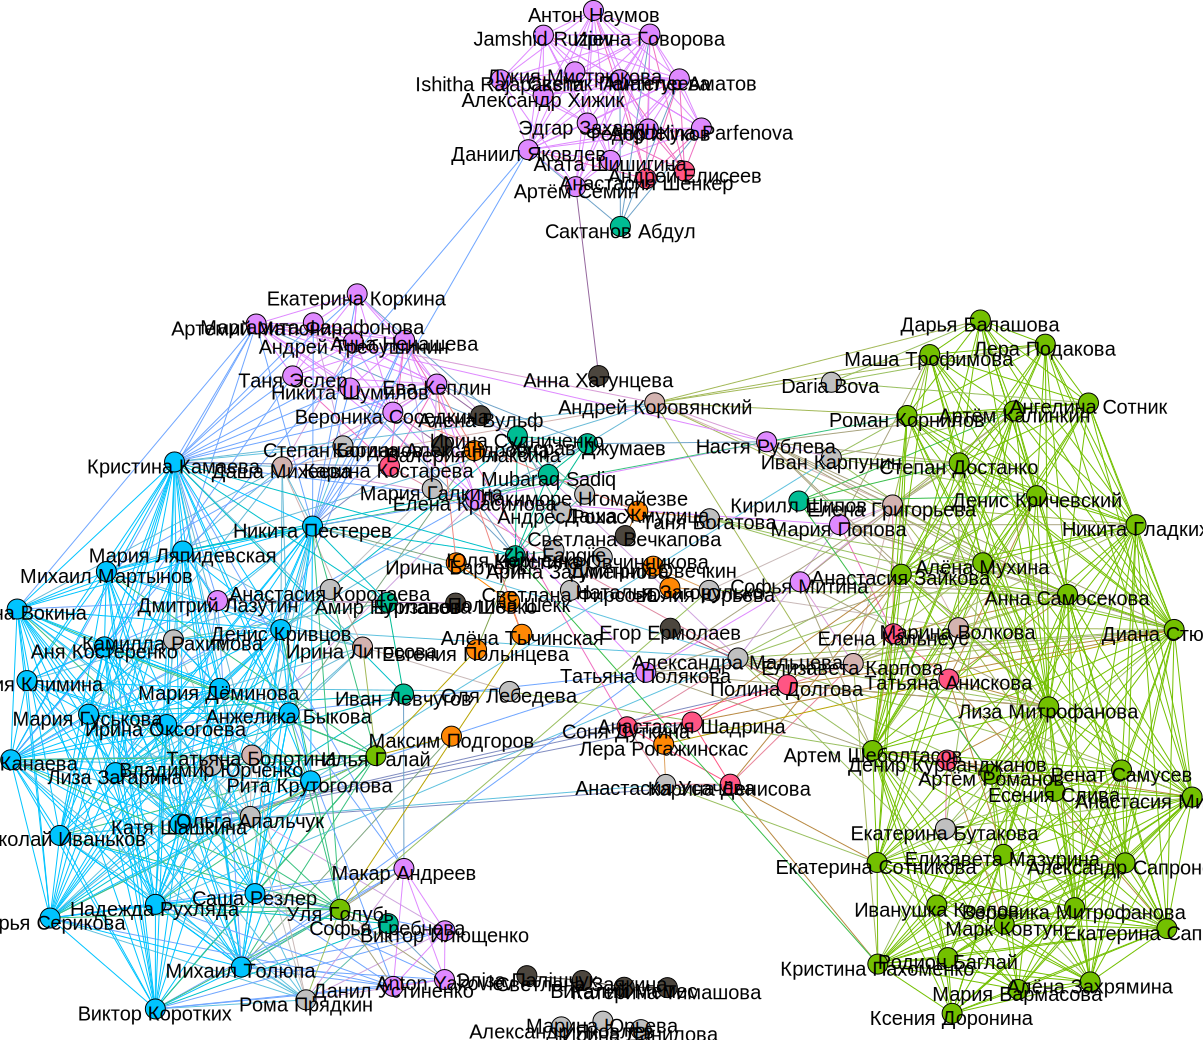

In [59]:
SVG(filename="cores.svg")

Description  

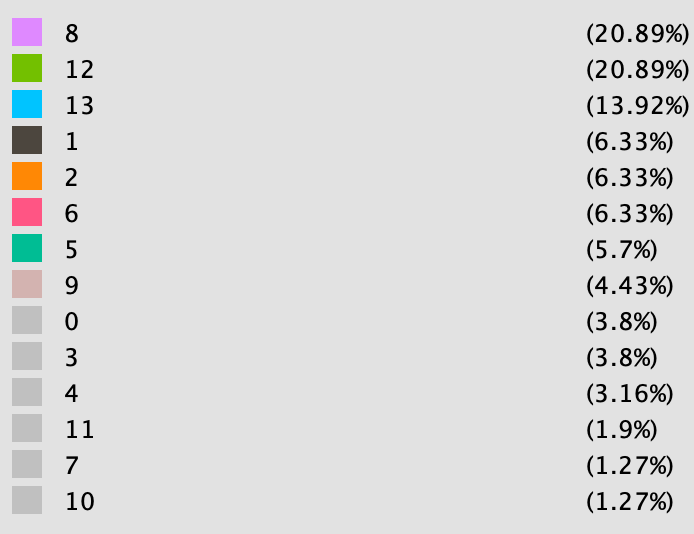

The connected components that are left after all vertices of degree less than k have been removed are called the k-cores of the graph and the degeneracy of a graph is the largest value k such that it has a k-core.

## Community detection

###Gephi communities based on modularity score

In [60]:
from IPython.display import Image

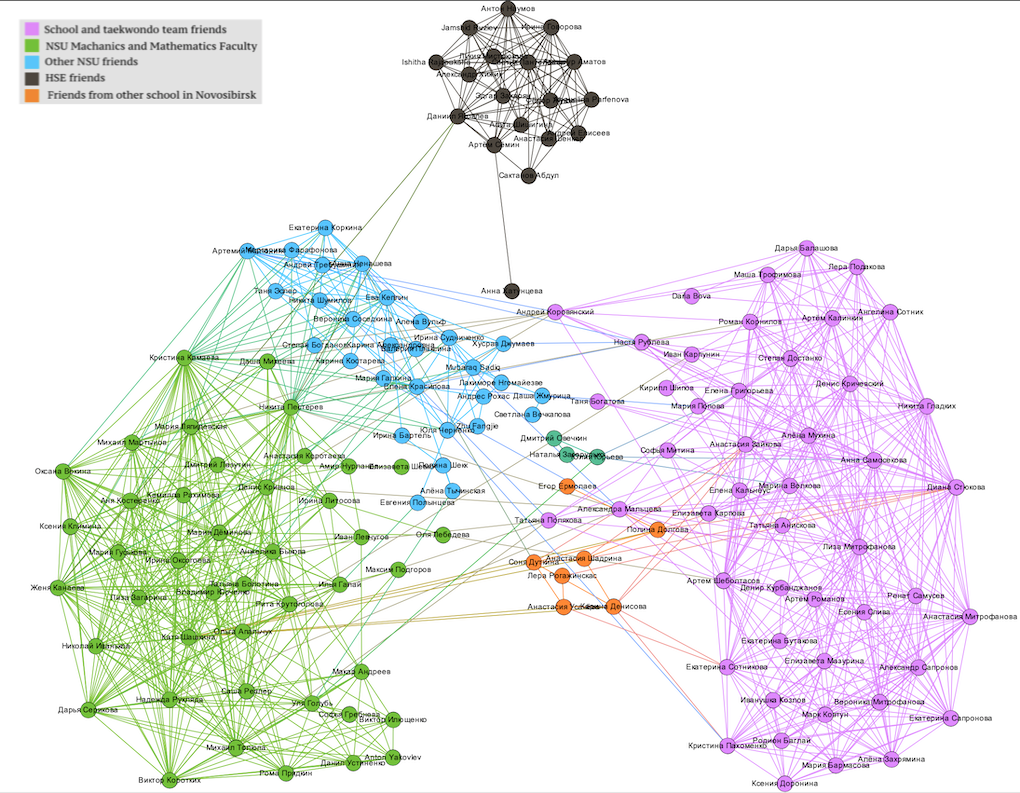

In [61]:
Image(filename ="gephi_comm.png")

This community detection is pretty accurate, but it doesn's see the difference between my school and taekwondo team friends

## Other communities detection methods

In [62]:
from sklearn.metrics import silhouette_score

def silhouette_val(g, partitions):
  g_size = len(g.nodes)
  spl_array = np.zeros([g_size, g_size])
  labels = []
  for node_a, i in zip(g.nodes(), range(g_size)):
    labels.append(partitions[node_a])
    for node_b, j in zip(lc.nodes(), range(g_size)):
      spl_array[i,j] = nx.shortest_path_length(lc, node_a, node_b)

  ss = silhouette_score(spl_array, np.array(labels), metric='precomputed')
  return ss

In [63]:
def show_communities(alg_title, alg_func, graph, modularity, silhouette):
  fig = plt.figure(figsize=(10, 10))
  coms_list, coms = alg_func(graph)
  modularity.append(com.quality.modularity(graph, coms_list))
  silhouette.append(silhouette_val(graph, coms))
  plt.title(alg_title)
  nodes = nx.draw_networkx_nodes(graph,
                                 nx.kamada_kawai_layout(graph),
                                 coms.keys(),
                                 node_size=40,
                                 cmap=plt.cm.Set1,
                                 node_color=list(coms.values()))
  nx.draw_networkx_edges(graph,
                          pos=nx.kamada_kawai_layout(graph),
                          width=0.2)
  plt.legend(*nodes.legend_elements(), ncol=len(nodes.legend_elements()))
  plt.show()

In [64]:
from networkx.algorithms import community as com
lc_nodes =sorted([list(cc) for cc in nx.connected_components(G)], key=len, reverse=True)[0]
lc = G.subgraph(lc_nodes).copy()

###Clauset-Newman-Moore greedy modularity maximization

In [65]:
def gmc(g):
  c = [set(com) for com in com.greedy_modularity_communities(g)]
  partition = {node:c.index(com) for com in c for node in com }
  return c, partition

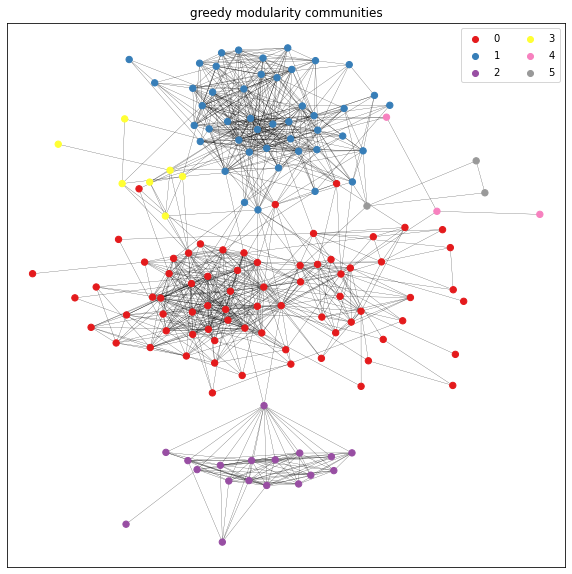

In [66]:
modularity = []
silhouette = []
show_communities('greedy modularity communities', gmc, g, modularity, silhouette)

* Red - <font color='red'>NSU friends</font>   
* Blue - <font color='blue'>School friends and taekwondo team</font>  
* Purple - <font color='Purple'>HSE friends</font>  
* Yellow - <font color='yellow'>Another school friends</font>
* Pink - <font color='pink'>I don't know how describe this cluster, there are different people from Novosibirsk</font>
* Gray - <font color='gray'>My family</font>

It's not the best description, in my opinion. Because my NSU friend should be in different communities.

### Louvain method

In [67]:
!pip install python-louvain

In [68]:
import community as community_louvain
def lm(g):
  partition = community_louvain.best_partition(lc)
  unique_com = set(v for _,v in partition.items())
  coms = []
  for com in unique_com:
    com_list = set()
    for k,v in partition.items():
      if v == com:
        com_list.add(k)
    coms.append(com_list)
  return coms, partition

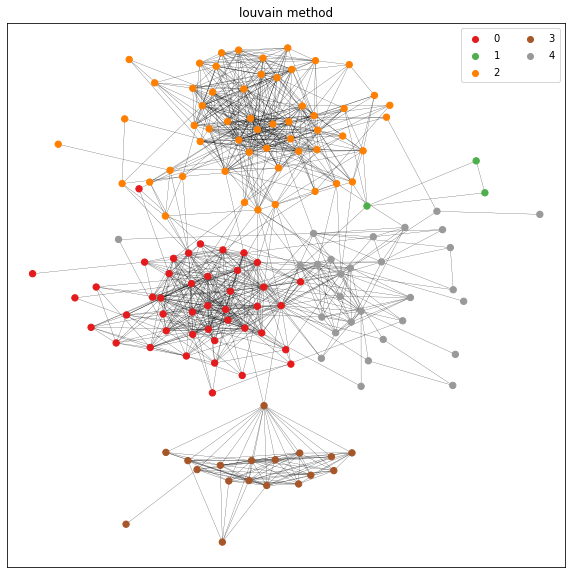

In [69]:
show_communities('louvain method', lm, g, modularity, silhouette)

* Green - <font color='green'>My family</font>   
* Red - <font color='red'>MMF friends</font>  
* Orange - <font color='orange'>School friends</font>  
* Brown - <font color='brown'>HSE friends</font> 
* Gray - <font color='gray'>NSU photoclub and foreign NSU students friends</font>



This description is better.

### Spectral clustering

In [70]:
def norm_laplacian(A):
    G = nx.from_numpy_matrix(A)
    D = np.array(list(G.degree()))[:,1].astype(int)
    L = np.diag(D**(-1/2))@(np.diag(D) - A)@np.diag(D**(-1/2))
    return L, D


def spectral_embedding(L, degree_seq, n_components):
  vals, vecs = np.linalg.eigh(L)
  return (vecs*degree_seq.reshape((-1,1))**(-1/2))[:, 1:n_components+1]

In [71]:
def sc(G, n_clusters, n_components):
    A = nx.to_numpy_array(G)
    L, degree_seq = norm_laplacian(A)
    embedding = spectral_embedding(L, degree_seq, n_components)
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(embedding)
    partition = dict(zip(G.nodes(), kmeans.labels_))
    unique_com = set(v for _,v in partition.items())
    coms = []
    for com in unique_com:
      com_list = set()
      for k,v in partition.items():
        if v == com:
          com_list.add(k)
      coms.append(com_list)
    return coms, partition

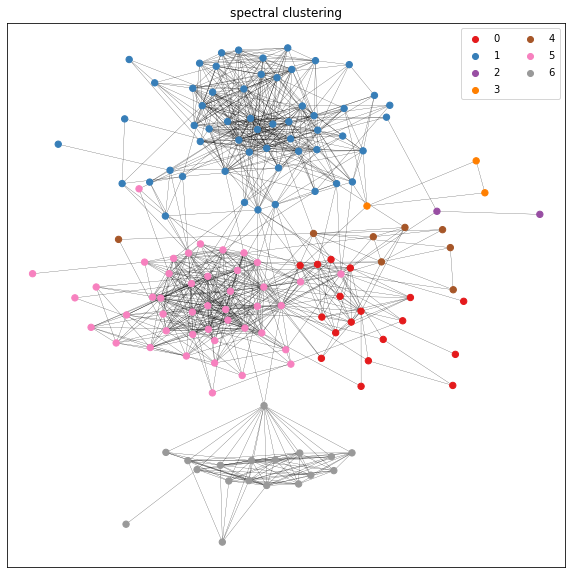

In [72]:
show_communities('spectral clustering', lambda x: sc(x, 7, 6), g, modularity, silhouette)

* Red - <font color='red'>My family</font>   
* Blue - <font color='blue'>I don't know how describe this cluster, there are different people from Novosibirsk</font>  
* Purple - <font color='Purple'>People I met in school</font>  
* Brown - <font color='brown'>MMF NSU friends</font>  
* Pink - <font color='pink'>Foreign NSU students </font>
* Gray - <font color='gray'>HSE friends </font>

This communities description is better then greedy modularity, but his quality, in my opinion, as well as louvain method.

### Agglomerative clustering

In [77]:
def ac(g, max_distance):
  distance = np.round(1 - nx.simrank_similarity_numpy(g), 7)
  model = AgglomerativeClustering(n_clusters=None, affinity='precomputed', linkage='complete', compute_full_tree=True, distance_threshold=max_distance).fit(distance)
  partition = dict(zip(g.nodes(), model.labels_))
  nx.set_node_attributes(g, {n:{'aggl_clust': c} for n, c in partition.items()})
  unique_com = set(v for _,v in partition.items())
  coms = []
  for com in unique_com:
    com_list = set()
    for k,v in partition.items():
      if v == com:
        com_list.add(k)
    coms.append(com_list)
  return coms, partition

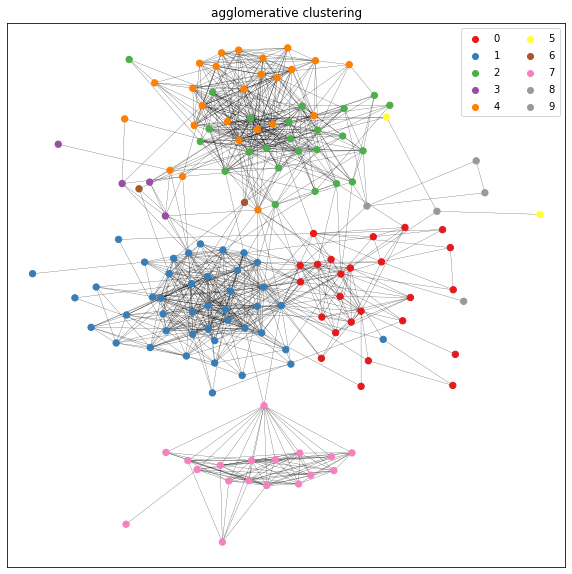

In [78]:
show_communities('agglomerative clustering', lambda x: ac(g, 0.92), g, modularity, silhouette)

* Red - <font color='red'>NSU photoclub and foreign NSU students friends</font>   
* Blue - <font color='blue'>MMF NSU friends</font>  
* Green - <font color='green'>School friends</font>  
* Purple - <font color='purple'>Another school friends</font>  
* Orange - <font color='orange'>Taekwondo team friends</font>  
* Pink - <font color='pink'>HSE friends</font>
* Gray - <font color='gray'>Family</font>

Value *0.92* for this clusterng was chosen experimentaly. Its describes my network the best way. And, in my opinion, this clustering algorithm describes my network the best way, bacause it's the only one who can understand the diffenece between my taekwondo team and school friends.



In [79]:
nx.write_gexf(g, "aggl_clst.gexf")

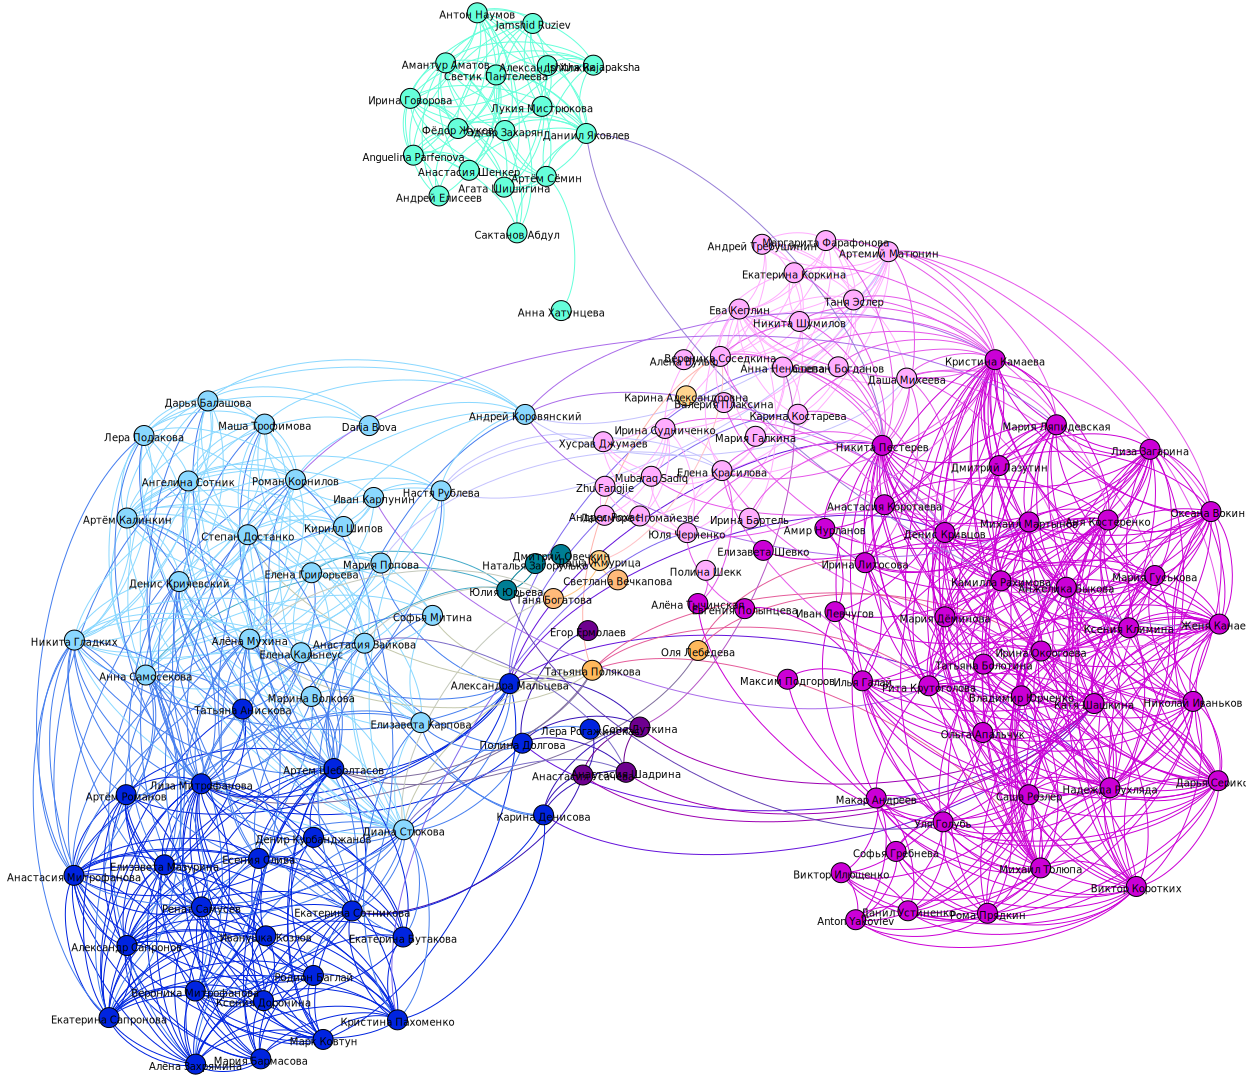

In [80]:
SVG(filename="comm_agl.svg")

###Comparising

In [75]:
comm_quality_df = pd.DataFrame(data= {
                              'modularity': modularity,
                              'silhouette': silhouette}, 
                               index = ['greedy modularity communities', 
                                        'louvain method', 
                                        'spectral clustering', 
                                        'agglomerative_clustering'])
comm_quality_df['sum'] = comm_quality_df.sum(axis=1)/len(comm_quality_df.columns)

In [76]:
comm_quality_df.sort_values(by=['sum'], ascending=False)

modularity  silhouette       sum
louvain method                   0.583675    0.304525  0.444100
spectral clustering              0.572192    0.306584  0.439388
greedy modularity communities    0.541334    0.264947  0.403141
agglomerative_clustering         0.550897    0.203321  0.377109

By this tablse, we can say, that spectral clustering model is the highest quality model, but, in I think agglomerative clustering model did it by its best.